In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



In [2]:
# 模拟 DRT 数据
def generate_dummy_drt(num_samples=5, min_tau=-3, max_tau=3, points_per_sample=30):
    DRTdata = []
    for i in range(num_samples):
        tau = np.logspace(min_tau, max_tau, points_per_sample)
        R = np.exp(-((np.log10(tau) - i/2)**2) * (1.5 + 0.3*i)) * (1 + 0.1*np.random.randn(points_per_sample))
        P = np.abs(np.sin(np.log10(tau) + i)) * 50  # 第二种物理量，比如极化
        DRTdata.append(np.vstack([R, P, tau]))  # 3 x m，每行为 R, P, tau
    return DRTdata

DRTdata = generate_dummy_drt()


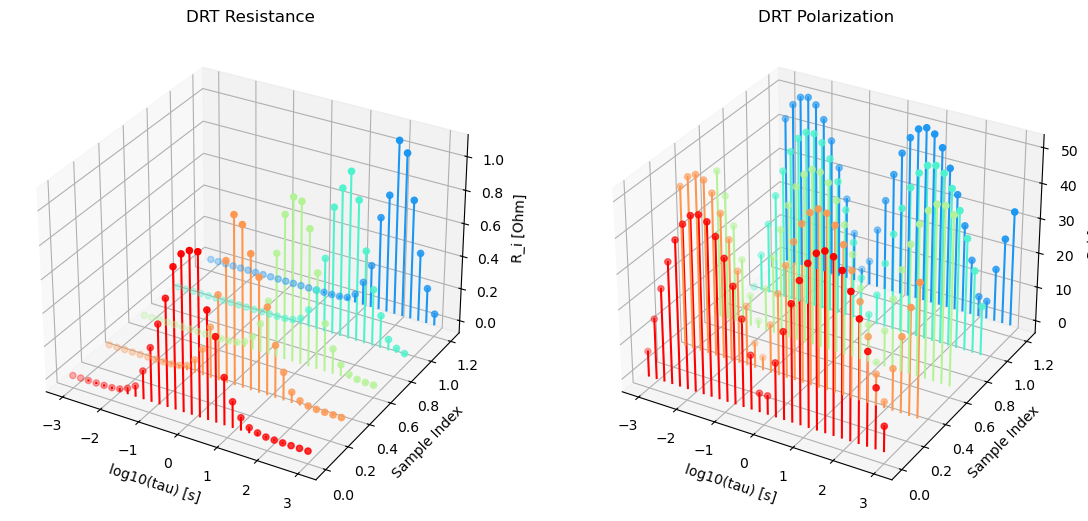

In [3]:
fig = plt.figure(figsize=(12, 6))

# 添加两个 3D 子图
ax_r = fig.add_axes([0.07, 0.1, 0.4, 0.8], projection='3d')
ax_p = fig.add_axes([0.55, 0.1, 0.4, 0.8], projection='3d')

cmap = plt.colormaps['rainbow_r']
z_offset = 0.3

for i, drt in enumerate(DRTdata):
    R_i, P_i, tau_i = drt
    z = np.ones_like(tau_i) * i * z_offset
    x = np.log10(tau_i)

    color = cmap(i / len(DRTdata))

    # 画 R_i 的 3D stem
    for xi, zi, yi in zip(x, z, R_i):
        ax_r.plot([xi, xi], [zi, zi], [0, yi], color=color, linewidth=1.5)
    ax_r.scatter(x, z, R_i, color=color, s=20)

    # 画 P_i 的 3D stem
    for xi, zi, yi in zip(x, z, P_i):
        ax_p.plot([xi, xi], [zi, zi], [0, yi], color=color, linewidth=1.5)
    ax_p.scatter(x, z, P_i, color=color, s=20)

# 设置标签和视角
ax_r.set_xlabel('log10(tau) [s]')
ax_r.set_ylabel('Sample Index')
ax_r.set_zlabel('R_i [Ohm]')
ax_r.set_title('DRT Resistance')
ax_r.view_init(elev=30, azim=-60)

ax_p.set_xlabel('log10(tau) [s]')
ax_p.set_ylabel('Sample Index')
ax_p.set_zlabel('P_i [a.u.]')
ax_p.set_title('DRT Polarization')
ax_p.view_init(elev=30, azim=-60)

plt.show()
